In [5]:
import os 
import random
import tensorflow as tf
from tensorflow import keras
import numpy as np
from glob import glob
from tensorflow import data 
from tensorflow import image

# import plotly.express as px
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from huggingface_hub import from_pretrained_keras

/home/lengocthanh/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
IMAGE_SIZE = (124, 124)
def load_image(filename):
    image = tf.io.read_file(filename)
    image = tf.image.decode_png(image, channels = 3)
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image/255.
    return image
def show_image(image, show=False):
    """
    Displays the given image.
    
    Args:
        image (tf.Tensor): The image tensor to display.
        show (bool, optional): Whether to display the image. Defaults to False.
    """
    image = tf.squeeze(image)
    plt.imshow(image)
    plt.axis('off')
    
    if show:
        plt.show()

In [23]:
def preprocess_frame(frame, image_size=(124, 124)):
    # Convert the frame from BGR to RGB (since cv2 reads images in BGR format)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Convert the frame to a tensor
    image = tf.convert_to_tensor(frame_rgb, dtype=tf.float32)
    
    # Resize the image to the desired size
    image = tf.image.resize(image, image_size)
    
    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0
    
    return image

In [ ]:
# Note: 'keras<3.x' or 'tf_keras' must be installed (legacy)
# See https://github.com/keras-team/tf-keras for more details.
from huggingface_hub import from_pretrained_keras

model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet")


In [ ]:
from transformers import pipeline  

classifier = pipeline("text-generation", model = 'distilgpt2')

In [5]:
res = classifier(
    "My mom is a diligent person,",
    max_length = 30,
    num_return_sequences = 2,
)
print(res)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'My mom is a diligent person, always making sure she’s getting everything she wants out of her box.\n\n\n\nYou can read'}, {'generated_text': 'My mom is a diligent person, having done an excellent job and being a productive adult. In a world where more women play on their backs, it'}]


In [2]:
import tensorflow as tf
print(tf.__version__)

2024-10-15 23:43:55.333179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-15 23:43:55.599884: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-15 23:43:55.599900: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-15 23:43:55.633812: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 23:43:56.407742: W tensorflow/stream_executor/platform/de

2.10.0


In [3]:
# model = tf.keras.models.load_model("F:/machine_learning/lowlight-enhance-mirnet")
model = tf.keras.models.load_model("/home/lengocthanh/projects/lowlight-enhance-mirnet/")

2024-10-15 23:44:00.431746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-15 23:44:00.432239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-15 23:44:00.432330: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-10-15 23:44:00.432399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-10-15 23:44:00.432461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [48]:

cap = cv2.VideoCapture('output_video.mp4')

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# while cap.isOpened():
#     # Capture frame-by-frame
#     ret, frame = cap.read()
    
#     if not ret:
#         print("End of video stream.")
#         break
#     frame = preprocess_frame(frame)
#     cv2.imshow('Frame', frame)
    
#     # Press Q on keyboard to exit
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#         break

ret, frame = cap.read(3000)

# Release the video capture object
cap.release()
# Close all OpenCV windows
cv2.destroyAllWindows()


Error: Could not open video.


In [28]:
# img = load_image("F:/machine_learning/data/lol_dataset/eval15/low/780.png")
# img = load_image("F:/temporary/night_street.png")
frm = preprocess_frame(frame)
expand_img = tf.expand_dims(frm, axis = 0)
ouput = model.predict(expand_img)

: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


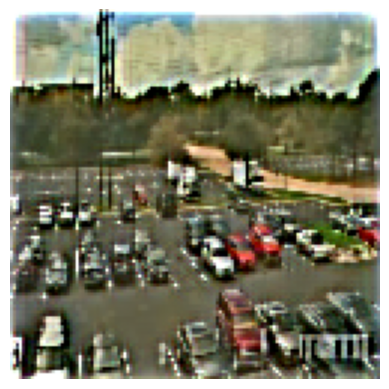

In [29]:
show_image(ouput[0])

In [31]:
frame.shape

(480, 854, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


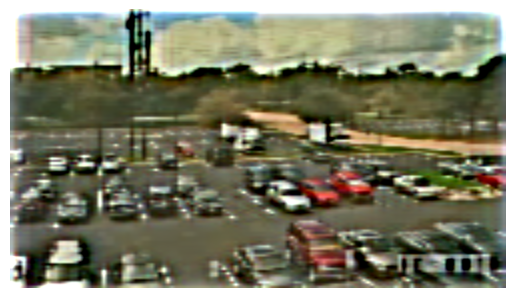

In [33]:
image = tf.image.resize(ouput[0], (frame.shape[0], frame.shape[1]))
show_image(image)

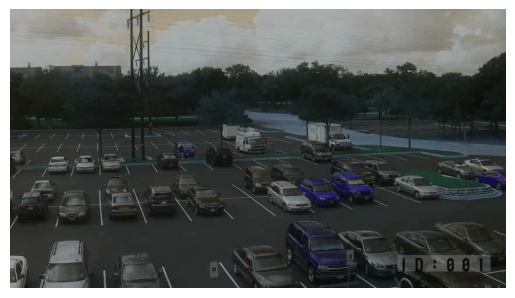

In [35]:
show_image(frame)

In [47]:
def reduce_brightness(frame, brightness_factor=0.5):
    """
    Reduces the brightness of a given frame.
    
    Args:
        frame: The input frame (image) as a NumPy array.
        brightness_factor: A factor between 0 and 1 to adjust brightness.
                           0 results in a completely dark frame, 1 leaves it unchanged.
    
    Returns:
        The frame with reduced brightness.
    """
    # Clip the values to be in the valid range [0, 255] after adjusting brightness
    adjusted_frame = cv2.convertScaleAbs(frame, alpha=brightness_factor, beta=0)
    return adjusted_frame

def process_video(input_path, output_path, brightness_factor=0.5):
    # Open the video file
    cap = cv2.VideoCapture(input_path)
    
    # Get the video's width, height, and frames per second (fps)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Define the codec and create VideoWriter object for the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Reduce the brightness of the frame
        adjusted_frame = reduce_brightness(frame, brightness_factor)
        
        # Write the adjusted frame to the output video
        out.write(adjusted_frame)
    
    # Release video capture and writer objects
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage:
input_video_path = 'videos/dark_condition.avi'  # Replace with your input video path
output_video_path = 'output_video.mp4'  # Replace with your desired output video path
brightness_factor = 0.2  # Adjust this value as needed (0 = dark, 1 = no change)

process_video(input_video_path, output_video_path, brightness_factor)